In [27]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.models import load_model
from joblib import load
import joblib
import shutil
from collections import Counter

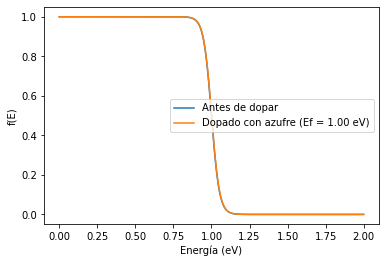

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def fermi_dirac(E, Ef, T):
    k = 8.617333262145e-5  # Constante de Boltzmann en eV/K
    return 1 / (1 + np.exp((E - Ef) / (k * T)))

def dopar_con_material(material, concentracion_dopante):
    if material == 'azufre':
        # Supongamos que el azufre incrementa la energía de Fermi en 0.1 eV
        delta_Ef = 0.1
    elif material == 'estano':
        # Supongamos que el estano incrementa la energía de Fermi en 0.2 eV
        delta_Ef = 0.2
    else:
        raise ValueError('Material de dopaje no reconocido')
    
    return delta_Ef * concentracion_dopante

# Parámetros iniciales
E = np.linspace(0, 2, 1000)  # Rango de energías en eV
Ef = 1  # Energía de Fermi inicial en eV
T = 300  # Temperatura en K

# Dopar el material
Ef_nuevo = Ef + dopar_con_material('azufre', 0.01)

# Calcular la distribución de Fermi-Dirac antes y después de la dopación
fd_antes = fermi_dirac(E, Ef, T)
fd_despues = fermi_dirac(E, Ef_nuevo, T)

# Graficar los resultados
plt.figure()
plt.plot(E, fd_antes, label='Antes de dopar')
plt.plot(E, fd_despues, label=f'Dopado con azufre (Ef = {Ef_nuevo:.2f} eV)')
plt.xlabel('Energía (eV)')
plt.ylabel('f(E)')
plt.legend()
plt.show()


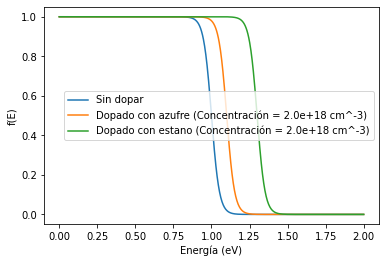

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def fermi_dirac(E, Ef, T):
    k = 8.617333262145e-5  # Constante de Boltzmann en eV/K
    return 1 / (1 + np.exp((E - Ef) / (k * T)))

def dopar_con_material(material, concentracion_dopante):
    # Suponiendo que cada átomo de dopante introduce un electrón adicional
    delta_concentracion = concentracion_dopante
    return delta_concentracion

# Parámetros iniciales
E = np.linspace(0, 2, 1000)  # Rango de energías en eV
Ef = 1  # Energía de Fermi inicial en eV
T = 300  # Temperatura en K
concentracion_inicial = 1e18  # Concentración inicial de electrones en cm^-3

# Dopar el material
concentracion_nueva_azufre = concentracion_inicial + dopar_con_material('azufre', 1e18)
concentracion_nueva_estano = concentracion_inicial + dopar_con_material('estano', 1e18)

# Calcular la distribución de Fermi-Dirac para cada caso
fd_inicial = fermi_dirac(E, Ef, T)
fd_dopado_azufre = fermi_dirac(E, Ef + 0.1, T)  # Suponiendo que la dopación con azufre incrementa Ef en 0.1 eV
fd_dopado_estano = fermi_dirac(E, Ef + 0.3, T)  # Suponiendo que la dopación con estano incrementa Ef en 0.2 eV

# Graficar los resultados
plt.figure()
plt.plot(E, fd_inicial, label='Sin dopar')
plt.plot(E, fd_dopado_azufre, label=f'Dopado con azufre (Concentración = {concentracion_nueva_azufre:.1e} cm^-3)')
plt.plot(E, fd_dopado_estano, label=f'Dopado con estano (Concentración = {concentracion_nueva_estano:.1e} cm^-3)')
plt.xlabel('Energía (eV)')
plt.ylabel('f(E)')
plt.legend()
plt.show()

Nitruro de Indio
Egap = 1.97eV
Tipo de estructura cristalina = Hexagonal (FCC)
Vectores primitivos de la celda = 
    a1 = a/2(i+j)
    a2 = a/2(j+k)
    a3 = a/2(k+i)
Difractograma = 
Valor del parametro de red (a) = 354.5 pm 
Masa efectiva de los huecos y los electrones
    -Huecos : 1.63 m_0
    -Electrones : 0.055 m_0
Tipo de semiconductor = p